# Лабораторная работа №3

**Выполнили:**
* Новичков Дмитрий 438329
* Чемякин Андрей 285610
* Васильев Василий 367963

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

## Датасет №1. Air Quality and Pollution Assessment
### Загрузим датасет

In [2]:
url = 'https://drive.google.com/uc?id=1w-R855o8GegnRptuiiQnmAhLgyFTpe3L'
data_classification = pd.read_csv(url)

data_classification.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


### Препроцессинг и отбор признаков

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
data_classification.drop_duplicates(keep='first',inplace=True)
data_classification.isnull().any()

,0
Temperature,False
Humidity,False
PM2.5,False
PM10,False
NO2,False
SO2,False
CO,False
Proximity_to_Industrial_Areas,False
Population_Density,False
Air Quality,False


In [5]:
le = LabelEncoder()
data_classification['Air Quality'] = le.fit_transform(data_classification['Air Quality'])

In [6]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


In [7]:
for col in data_classification.drop(columns='Air Quality').columns:
    q1=np.quantile(data_classification[col],0.25)
    q3=np.quantile(data_classification[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    data_classification=data_classification[(data_classification[col]>=lb)&(data_classification[col]<=ub)]

In [8]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


In [9]:
corr_matrix = data_classification.drop(columns='Air Quality').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_classification.drop(columns=to_drop, inplace=True)

In [10]:
data_classification.head(5)

,Temperature,Humidity,PM2.5,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,21.9,5.6,1.01,12.7,303,0


### Разделение данных

In [11]:
from sklearn.model_selection import train_test_split

X = data_classification.drop(columns='Air Quality')
y = data_classification['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2910, 8) (2910,) (1248, 8) (1248,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построение классификатора

Модель: **LogisticRegression**.

Логистическая регрессия возвращает вероятность принадлежности объекта к классу:
$$
P(y=1|x) = \frac{1}{1 + \exp(-z)}, \quad z = w_0 + \sum_{i=1}^n w_i x_i
$$

Решение основано на пороговом значении вероятности (обычно 0.5):
$$
\hat{y} =
\begin{cases}
1, & P(y=1|x) \geq \text{threshold} \\
0, & P(y=1|x) < \text{threshold}
\end{cases}
$$

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

warnings.filterwarnings("ignore")


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga', 'liblinear']
}


model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение F1-score:", grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Лучшие параметры: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Лучшее значение F1-score: nan


### Построение ROC-кривой
ROC-кривая (Receiver Operating Characteristic) иллюстрирует соотношение между **чувствительностью** ($ TPR $) и **ложноположительной долей** ($ FPR $) при изменении порога классификации.

#### Формулы:
1. **Чувствительность (True Positive Rate, TPR)**:
$$
TPR = \frac{TP}{TP + FN}
$$
где $TP$ — число истинно положительных срабатываний, $FN$ — число ложноотрицательных.

2. **Ложноположительная доля (False Positive Rate, FPR)**:
$$
FPR = \frac{FP}{FP + TN}
$$
где $FP$ — число ложноположительных срабатываний, $TN$ — число истинно отрицательных.

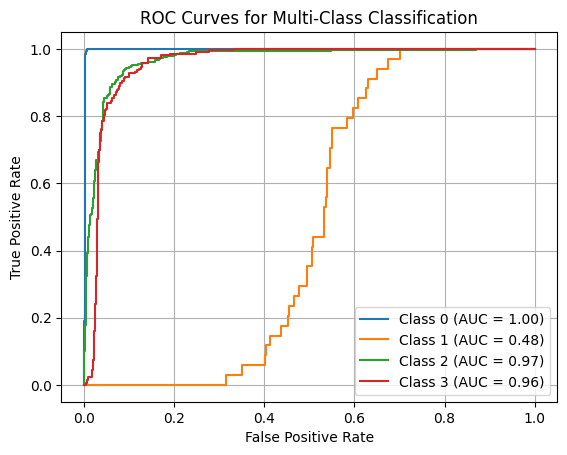

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


classes = np.unique(y_test)

y_test_bin = label_binarize(y_test, classes=classes)
probs = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_bin, probs, multi_class="ovr", average="micro")

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend()
plt.grid()
plt.show()

### Оценка классификации
#### **Метрики для классификации**

#### Основные метрики
1. **Accuracy (Точность)**  
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
   - Подходит для сбалансированных данных.

2. **Precision (Точность по классу)**  
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
   - Указывает, насколько точно модель классифицирует положительный класс.

3. **Recall (Полнота)**  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
   - Показывает долю найденных положительных объектов из всех положительных.

4. **F1-Score** (Гармоническое среднее Precision и Recall):
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

5. **ROC AUC (Площадь под кривой ROC)**  
$$
\text{AUC} = \int_0^1 \text{TPR}(x) \, dx
$$
   - Удобна для оценки бинарной классификации.

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

thresholds = np.linspace(0.1, 1, 10)
for threshold in thresholds:

    y_pred_bin = (probs >= threshold).astype(int)

    print(f'Порог: {threshold}')
    print(f'Accuracy: {accuracy_score(y_test_bin, y_pred_bin):.2f}')
    print(f'Precision (micro): {precision_score(y_test_bin, y_pred_bin, average="micro"):.2f}')
    print(f'Recall (micro): {recall_score(y_test_bin, y_pred_bin, average="micro"):.2f}')
    print(f'F1-score (micro): {f1_score(y_test_bin, y_pred_bin, average="micro"):.2f}')
    print('---')

Порог: 0.1
Accuracy: 0.33
Precision (micro): 0.56
Recall (micro): 0.97
F1-score (micro): 0.71
---
Порог: 0.2
Accuracy: 0.61
Precision (micro): 0.71
Recall (micro): 0.97
F1-score (micro): 0.82
---
Порог: 0.30000000000000004
Accuracy: 0.75
Precision (micro): 0.79
Recall (micro): 0.95
F1-score (micro): 0.86
---
Порог: 0.4
Accuracy: 0.84
Precision (micro): 0.85
Recall (micro): 0.92
F1-score (micro): 0.88
---
Порог: 0.5
Accuracy: 0.88
Precision (micro): 0.90
Recall (micro): 0.88
F1-score (micro): 0.89
---
Порог: 0.6
Accuracy: 0.80
Precision (micro): 0.93
Recall (micro): 0.80
F1-score (micro): 0.86
---
Порог: 0.7000000000000001
Accuracy: 0.65
Precision (micro): 0.96
Recall (micro): 0.65
F1-score (micro): 0.77
---
Порог: 0.8
Accuracy: 0.45
Precision (micro): 0.96
Recall (micro): 0.45
F1-score (micro): 0.62
---
Порог: 0.9
Accuracy: 0.31
Precision (micro): 0.99
Recall (micro): 0.31
F1-score (micro): 0.47
---
Порог: 1.0
Accuracy: 0.00
Precision (micro): 0.00
Recall (micro): 0.00
F1-score (micro)

### Оптимизация порога по F1-score

In [35]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize


classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

best_threshold = 0
best_f1 = 0

thresholds = np.linspace(0.1, 1, 10)
for threshold in thresholds:

    y_pred_bin = (probs >= threshold).astype(int)
    f1 = f1_score(y_test_bin, y_pred_bin, average="micro")

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Оптимальный порог: {best_threshold}')
print(f'Максимальный F1-score (micro): {best_f1:.2f}')

Оптимальный порог: 0.5
Максимальный F1-score (micro): 0.89


## Датасет №2. Prediction of Insurance Charges
### Загрузим датасет

In [10]:
url = 'https://drive.google.com/uc?id=1KDIhpV8oJHvMckXSoKkIOSP9tKGuqWCr'
data_regression = pd.read_csv(url)

data_regression.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### Препроцессинг и отбор признаков

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_regression['smoker'] = le.fit_transform(data_regression['smoker'])
data_regression['sex'] = le.fit_transform(data_regression['sex'])
data_regression['region'] = le.fit_transform(data_regression['region'])

In [12]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [13]:
spheres = ['age', 'children']

for i in range(len(spheres)):
    col1 = spheres[i]
    for j in range(len(spheres)):
        col2 = spheres[j]
        data_regression[f"{col1}_{col2}"] = data_regression[f"{col1}"] * data_regression[f"{col2}"]
data_regression.head()

,index,age,sex,bmi,children,smoker,region,charges,age_age,age_children,children_age,children_children
0,0,19,0,27.900,0,1,3,16884.92400,361,0,0,0
1,1,18,1,33.770,1,0,2,1725.55230,324,18,18,1
2,2,28,1,33.000,3,0,2,4449.46200,784,84,84,9
3,3,33,1,22.705,0,0,1,21984.47061,1089,0,0,0
4,4,32,1,28.880,0,0,1,3866.85520,1024,0,0,0


In [14]:
for col in data_regression.drop(columns='charges').columns:
    q1 = np.quantile(data_regression[col],0.25)
    q3 = np.quantile(data_regression[col],0.75)
    iqr = q3-q1
    lb = q1-iqr*1.5
    ub = q3+iqr*1.5
    data_regression = data_regression[(data_regression[col]>=lb) & (data_regression[col]<=ub)]

In [15]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 1 to 1336
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              990 non-null    int64  
 1   age                990 non-null    int64  
 2   sex                990 non-null    int64  
 3   bmi                990 non-null    float64
 4   children           990 non-null    int64  
 5   smoker             990 non-null    int64  
 6   region             990 non-null    int64  
 7   charges            990 non-null    float64
 8   age_age            990 non-null    int64  
 9   age_children       990 non-null    int64  
 10  children_age       990 non-null    int64  
 11  children_children  990 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 100.5 KB


In [16]:
data_regression.drop_duplicates(keep='first',inplace=True)
data_regression.isnull().any()

,0
index,False
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False
age_age,False
age_children,False


In [17]:
corr_matrix = data_regression.drop(columns='charges').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_regression.drop(columns=to_drop, inplace=True)

In [18]:
data_regression.head(5)

,index,age,sex,bmi,children,smoker,region,charges
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
5,5,31,0,25.740,0,0,2,3756.62160


### Разделим данные

In [19]:
from sklearn.model_selection import train_test_split

X = data_regression.drop(columns='charges')
y = data_regression['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(693, 7) (693,) (297, 7) (297,)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построение регрессора

Модель: **KNeighborsRegressor**.

#### Основная идея:
Метод $k$-ближайших соседей использует расстояние между точками для прогнозирования значения целевой переменной. Значение прогноза определяется как:
- Среднее значение (при $\text{weights} = \text{uniform} $).
- Взвешенное среднее (при $ \text{weights} = \text{distance} $).

$$
\hat{y} = \frac{\sum_{i=1}^k w_i y_i}{\sum_{i=1}^k w_i}, \quad w_i = \frac{1}{d(x, x_i)}
$$

где $ d(x, x_i) $ — метрика расстояния:
1. **Манхэттенская**:
   $$
   d(x, x_i) = \sum_{j=1}^n |x_j - x_{i,j}|
   $$
2. **Евклидова метрика**:
   $$
   d(x, x_i) = \sqrt{\sum_{j=1}^n (x_j - x_{i,j})^2}
   $$
3. **Метрика Чебышева**:
   $$
   d(x, x_i) = \max_j |x_j - x_{i,j}|
   $$

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [1, 3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['cityblock', 'euclidean', 'chebyshev']
}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['cityblock', 'euclidean', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

#### **Метрики для регрессии**

1. **Mean Squared Error (MSE)**  
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$
   - Наиболее популярна, но чувствительна к выбросам.

2. **Mean Absolute Error (MAE)**  
$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$
   - Устойчива к выбросам.

3. **$R^2$ (Коэффициент детерминации)**  
$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$
   - Показывает, насколько хорошо модель объясняет разброс данных.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_grid_reg = grid_search.best_estimator_

y_pred = best_grid_reg.predict(X_test)
mse_squared = mean_squared_error(y_test, y_pred)
mae_squared = mean_absolute_error(y_test, y_pred)
r2_squared = r2_score(y_test, y_pred)

print(f"MSE: {mse_squared:.2f}, MAE: {mae_squared:.2f}, R^2: {r2_squared:.2f}")

MSE: 27077240.08, MAE: 2878.85, R^2: 0.24


In [25]:
data_regression['prediction'] = best_grid_reg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


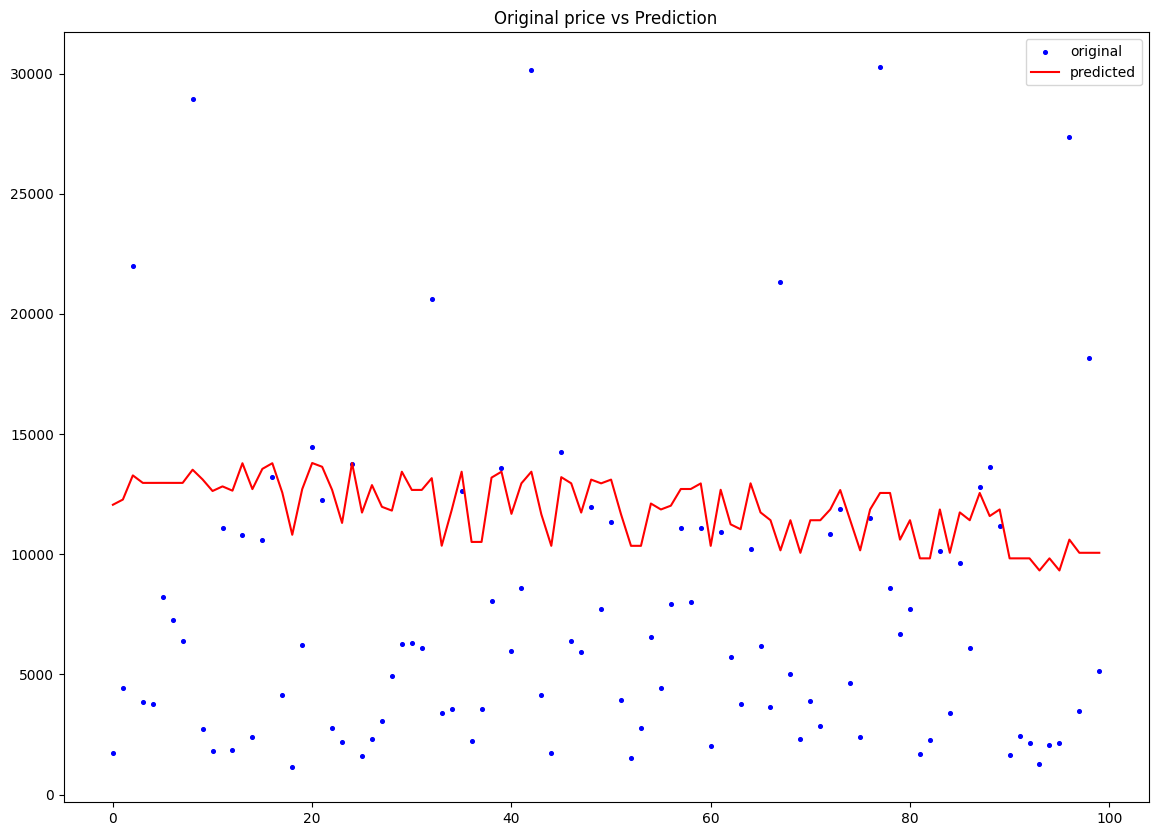

In [26]:
x_axis = range(len(data_regression['prediction'].head(100)))

plt.figure(figsize=(14,10))
plt.title('Original price vs Prediction')
plt.scatter(x_axis, data_regression['charges'].head(100), s=7, color="blue", label="original")
plt.plot(x_axis, data_regression['prediction'].head(100), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()